<a href="https://colab.research.google.com/github/cristinabergland/sistema-que-prediz-se-a-soja-esta-padrao-ou-nao-padrao-pycaret-Extra-Trees-Classifier-.ipynb/blob/main/sistema_que_prediz_se_a_soja_esta_padrao_ou_nao_padrao_pycaret_Extra_Trees_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [ ]:
data = pd.read_csv("/content/dataset_752.csv")

Exibindo as informações da base de dados

In [ ]:
# substitui os valores zerados da coluna 'S01'
# por '22.2'
#data['S01'] = data['S01'].map({0 : 22.2})

a = {0 : 'nao_padrao', 1 : 'padrao'}
data['target'] = data['target'].map(a)
data.head(15)

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0           500.0     13.9        5.0          0.0        0.0      106.3   
1           500.0     13.9        5.0          0.0        0.0      106.3   
2           500.0     13.5        3.5          0.0        0.0      106.3   
3           500.0     13.5        3.5          0.0        0.0      106.3   
4           500.0     13.4        3.5          0.0        0.0      106.3   
5           500.0     13.4        3.5          0.0        0.0      106.3   
6           500.0     13.4        3.5          0.0        0.0      106.3   
7           500.0     13.4        3.5          0.0        0.0      106.3   
8           500.0     14.0        1.0          0.0        0.0      106.3   
9           500.0     14.0        1.0          0.0        0.0      106.3   
10          500.0     13.9        5.0          0.0        0.0      106.3   
11          500.0     13.6        1.0          0.0        0.0      106.3   
12          500.0     13.6        1.0          0.0        0.0      106.3   
13          500.0     11.0        2.0          0.0        0.0      106.3   
14          500.0     14.0        4.5          0.0        0.0      106.3   

    target  
0   padrao  
1   padrao  
2   padrao  
3   padrao  
4   padrao  
5   padrao  
6   padrao  
7   padrao  
8   padrao  
9   padrao  
10  padrao  
11  padrao  
12  padrao  
13  padrao  
14  padrao

In [ ]:
data.head(15)

massa_amostra  umidade  impurezas  ...  quebrados  avariados      target
0           500.0     26.3       11.5  ...        0.0      192.7  nao_padrao
1           500.0     25.2       11.5  ...        0.0      176.7  nao_padrao
2           500.0     32.2       13.0  ...        0.0      172.7  nao_padrao
3           500.0     34.6       20.0  ...        0.0      172.7  nao_padrao
4           500.0     26.7       11.0  ...        0.0      172.7  nao_padrao
5           500.0     26.6       15.0  ...        0.0      170.1  nao_padrao
6           500.0     28.5       11.0  ...        0.0      159.4  nao_padrao
7           500.0     21.3       22.0  ...        0.0      132.9  nao_padrao
8           500.0     14.6       10.0  ...        0.0      132.9  nao_padrao
9           500.0     33.1       16.0  ...        0.0      130.2  nao_padrao
10          500.0     29.0       13.0  ...        0.0      127.6  nao_padrao
11          500.0     21.7       16.0  ...        0.0      127.6  nao_padrao
12          500.0     23.5       16.0  ...        0.0      106.3  nao_padrao
13          500.0     23.4       17.0  ...        0.0      106.3  nao_padrao
14          500.0     13.9        5.0  ...        0.0      106.3      padrao

[15 rows x 7 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   massa_amostra  751 non-null    float64
 1   umidade        751 non-null    float64
 2   impurezas      751 non-null    float64
 3   esverdeados    751 non-null    float64
 4   quebrados      751 non-null    float64
 5   avariados      751 non-null    float64
 6   target         751 non-null    object 
dtypes: float64(6), object(1)
memory usage: 41.2+ KB


In [ ]:
data.shape

(751, 7)

Análise Estatística Básica.

In [ ]:
data.describe()

massa_amostra     umidade   impurezas  esverdeados   quebrados  \
count          751.0  751.000000  751.000000   751.000000  751.000000   
mean           500.0   15.280692    6.248336     0.721704    1.850866   
std              0.0    5.366410    4.868735     5.698226   14.865051   
min            500.0   10.100000    0.500000     0.000000    0.000000   
25%            500.0   12.750000    4.000000     0.000000    0.000000   
50%            500.0   13.400000    5.000000     0.000000    0.000000   
75%            500.0   14.000000    5.000000     0.000000    0.000000   
max            500.0   35.700000   23.000000    75.000000  165.000000   

        avariados  
count  751.000000  
mean    57.630626  
std     29.511149  
min     13.300000  
25%     39.900000  
50%     53.100000  
75%     79.700000  
max    192.700000

Verificando a correlação dos atributos

<AxesSubplot:>

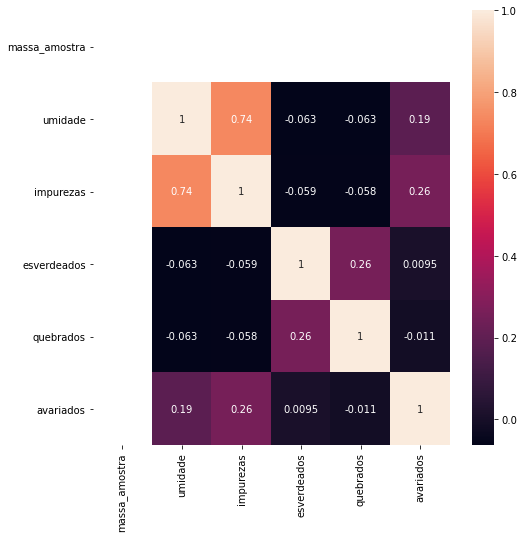

In [ ]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

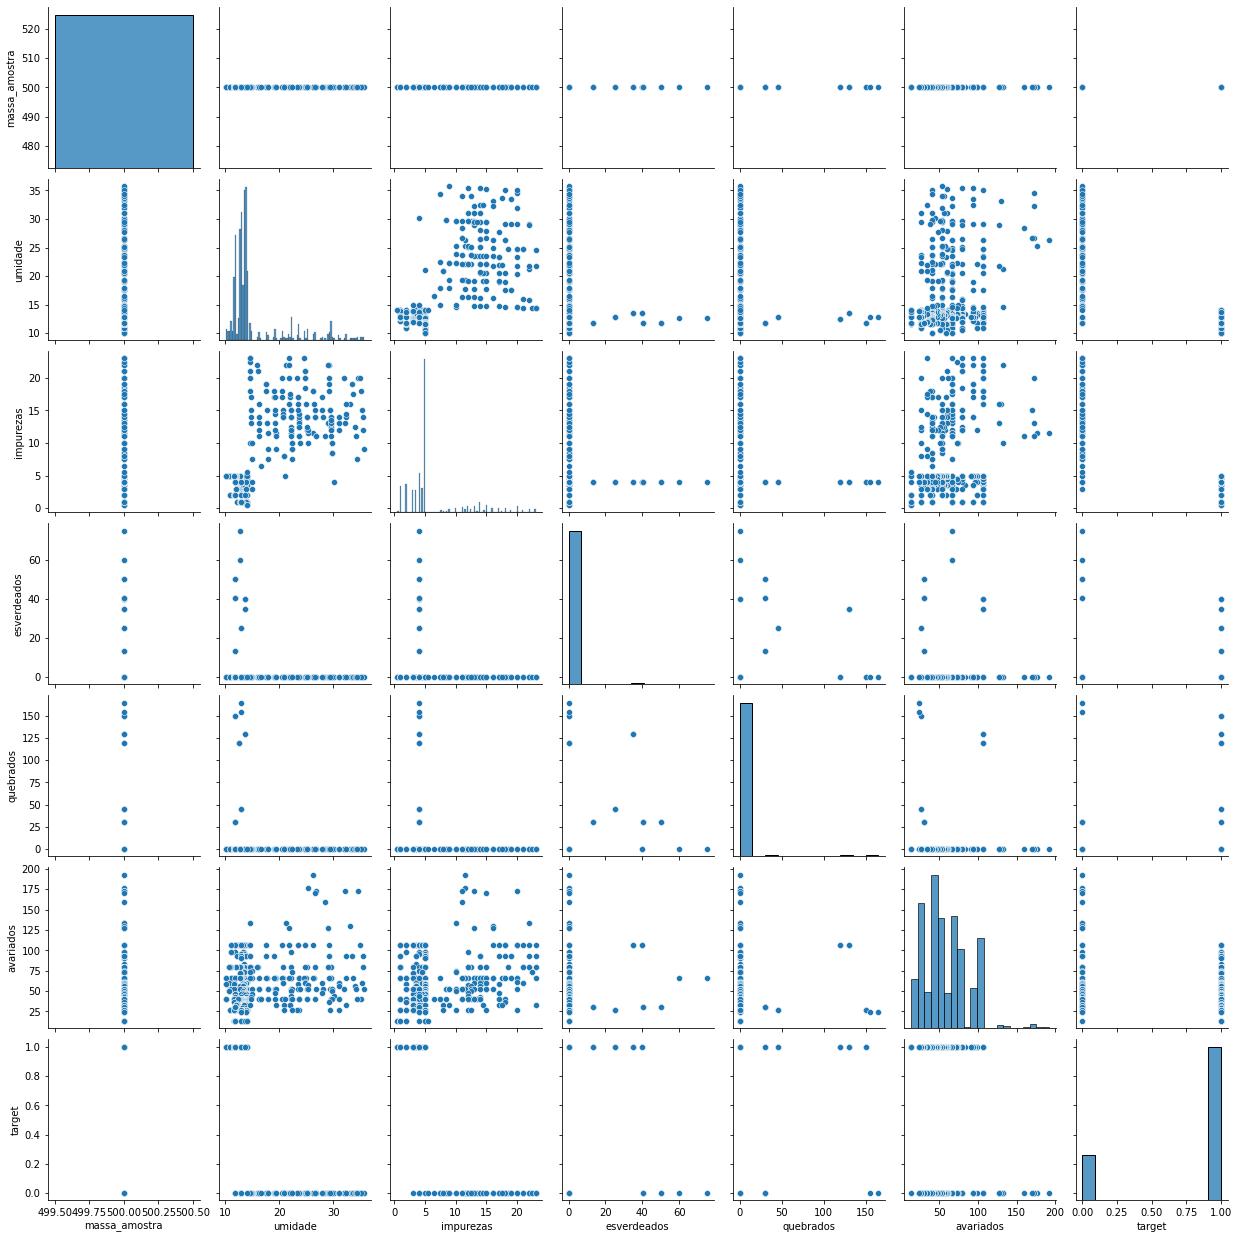

In [ ]:
sns.pairplot(data)

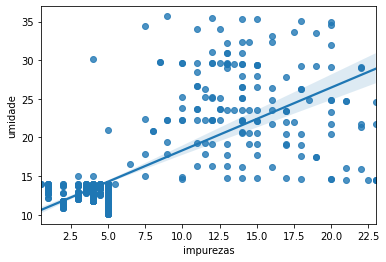

In [ ]:
ax = sns.regplot(x = data['impurezas'],y = data['umidade'])

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
#ferramenta que gera um relatório html com informações estatísticas e as principais características do dataset.
from pandas_profiling import ProfileReport

In [ ]:
#pandas_profiling estende o DataFrame do pandas df.profile_report()para uma rápida análise de dados.
profile = ProfileReport(data, title="Heart Dataset", html={'style': {'full_width': True}})

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:410: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='target', ylabel='count'>

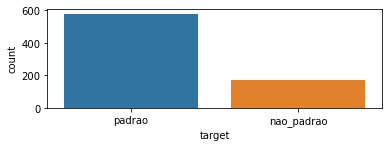

In [ ]:
plt.subplot(2,1,1)
sns.countplot(x = data['target'])

In [ ]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['umidade'],y = data['impurezas'])

In [ ]:
data.head()

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0          500.0     26.3       11.5          0.0        0.0      192.7   
1          500.0     25.2       11.5          0.0        0.0      176.7   
2          500.0     32.2       13.0          0.0        0.0      172.7   
3          500.0     34.6       20.0          0.0        0.0      172.7   
4          500.0     26.7       11.0          0.0        0.0      172.7   

       target  
0  nao_padrao  
1  nao_padrao  
2  nao_padrao  
3  nao_padrao  
4  nao_padrao

In [ ]:
# substitui os valores zerados da coluna 'S01'
# por '22.2'
#data['S01'] = data['S01'].map({0 : 22.2})

a = {0 : 'nao_padrao', 1 : 'padrao'}
data['target'] = data['target'].map(a)
data.head()

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0          500.0     13.9        5.0          0.0        0.0      106.3   
1          500.0     13.9        5.0          0.0        0.0      106.3   
2          500.0     13.5        3.5          0.0        0.0      106.3   
3          500.0     13.5        3.5          0.0        0.0      106.3   
4          500.0     13.4        3.5          0.0        0.0      106.3   

   target  
0  padrao  
1  padrao  
2  padrao  
3  padrao  
4  padrao

In [ ]:
pd.DataFrame(data['target'].unique())

0
0  nao_padrao
1      padrao

In [ ]:
data.columns

Index(['massa_amostra', 'umidade', 'impurezas', 'esverdeados', 'quebrados',
       'avariados', 'target'],
      dtype='object')

# Machine Learning

Separando os dados em features e classes.

In [ ]:
y = data['target']
x = data.drop(['target'],axis =1)

Separando os conjuntos de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [ ]:
acc=[]

pycaret colab modelo sem precisar separar dados de treino

In [ ]:
!pip install pycaret
import pandas as pd
import numpy as np
from pycaret.classification import *
train = pd.read_csv("/content/dataset_752.csv")
train.head()

     |████████████████████████████████| 264 kB 34.5 MB/s 
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 105 kB 54.3 MB/s 
     |████████████████████████████████| 25.9 MB 932 bytes/s 
     |████████████████████████████████| 1.3 MB 65.4 MB/s 
     |████████████████████████████████| 2.0 MB 26.0 MB/s 
     |████████████████████████████████| 14.4 MB 64 kB/s 
     |████████████████████████████████| 1.7 MB 26.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 56.1 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 271 kB 52.9 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 146 kB 50.1 MB/s 
     |█████████████████

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0          500.0     26.3       11.5          0.0        0.0      192.7   
1          500.0     25.2       11.5          0.0        0.0      176.7   
2          500.0     32.2       13.0          0.0        0.0      172.7   
3          500.0     34.6       20.0          0.0        0.0      172.7   
4          500.0     26.7       11.0          0.0        0.0      172.7   

       target  
0  nao_padrao  
1  nao_padrao  
2  nao_padrao  
3  nao_padrao  
4  nao_padrao

## Pycaret

In [ ]:
!pip install pycaret==2.2

^C


In [ ]:
from pycaret.classification import *

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spacy 3.0.6 requires pydantic<1.8.0,>=1.7.1, but you'll have pydantic 1.8.2 which is incompatible.


  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.7.4
    Uninstalling pydantic-1.7.4:
      Successfully uninstalled pydantic-1.7.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   massa_amostra  751 non-null    float64
 1   umidade        751 non-null    float64
 2   impurezas      751 non-null    float64
 3   esverdeados    751 non-null    float64
 4   quebrados      751 non-null    float64
 5   avariados      751 non-null    float64
 6   target         751 non-null    object 
dtypes: float64(6), object(1)
memory usage: 41.2+ KB


In [ ]:
numeric_features = ['massa_amostra', 'umidade', 'impurezas', 'esverdeados', 'quebrados','avariados']

In [ ]:
s = setup(data
          ,target = 'target'
          ,numeric_features = [ 'massa_amostra'
                               ,'umidade'
                               ,'impurezas'
                               ,'esverdeados'
                               ,'quebrados'
                               ,'avariados']
          ,log_experiment = True
          ,experiment_name = 'exp-bootcamp'
         )

Vamos comparar os modelos

In [ ]:
best = compare_models(fold = 5)

In [ ]:
data.head()

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0          500.0     26.3       11.5          0.0        0.0      192.7   
1          500.0     25.2       11.5          0.0        0.0      176.7   
2          500.0     32.2       13.0          0.0        0.0      172.7   
3          500.0     34.6       20.0          0.0        0.0      172.7   
4          500.0     26.7       11.0          0.0        0.0      172.7   

       target  
0  nao_padrao  
1  nao_padrao  
2  nao_padrao  
3  nao_padrao  
4  nao_padrao

In [ ]:
#download dataset
#data.to_csv('~/Desktop/file_name.csv')

Listando os modelos

Selecionando o melhor algoritmo

In [ ]:
et = create_model('et', fold = 5)

In [ ]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7561, verbose=0,
                     warm_start=False)


Otimizando o modelo

In [ ]:
tuned_et = tune_model(et,fold=5)

Visualizando os residuais

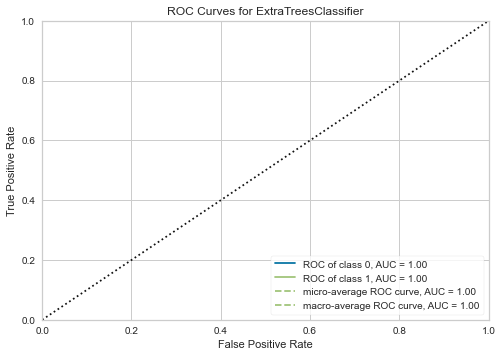

In [ ]:
plot_model(et)

Visualizando o erro do modelo

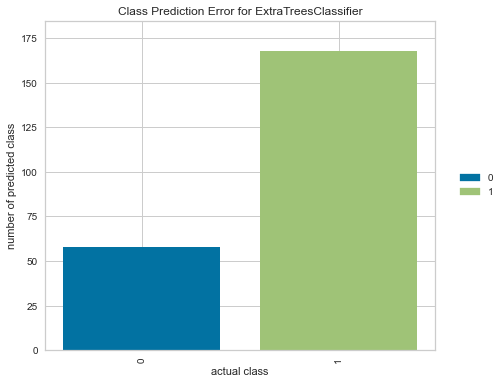

In [ ]:
plot_model(et, plot = 'error')

Visualizando as features importantes

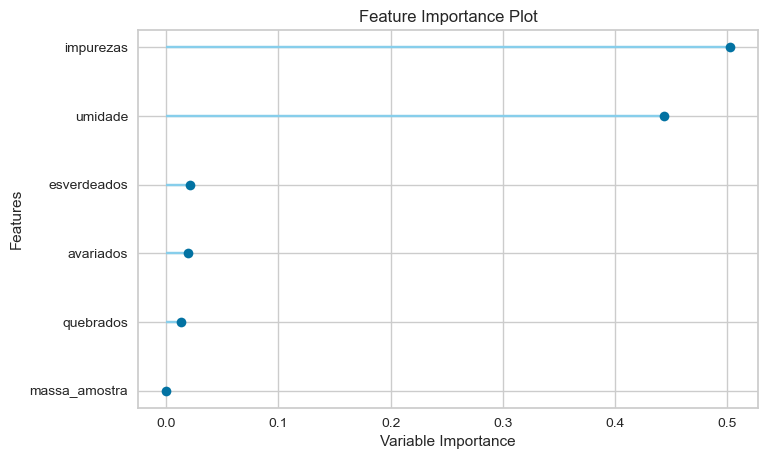

In [ ]:
plot_model(et, plot='feature')

In [ ]:
data.head()

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0          500.0     26.3       11.5          0.0        0.0      192.7   
1          500.0     25.2       11.5          0.0        0.0      176.7   
2          500.0     32.2       13.0          0.0        0.0      172.7   
3          500.0     34.6       20.0          0.0        0.0      172.7   
4          500.0     26.7       11.0          0.0        0.0      172.7   

       target  
0  nao_padrao  
1  nao_padrao  
2  nao_padrao  
3  nao_padrao  
4  nao_padrao

Finaliza o modelo

In [ ]:
final_et = finalize_model(et)

Salva o modelo

In [ ]:
save_model(final_et,'modelo-final-soja-classification-naopadrao_padrao')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['massa_amostra',
                                                           'umidade',
                                                           'impurezas',
                                                           'esverdeados',
                                                           'quebrados',
                                                           'avariados'],
                                       target='target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_ava...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
     

In [ ]:
ls

 O volume na unidade C ‚ Disco Local
 O N£mero de S‚rie do Volume ‚ 9A22-33C6

 Pasta de C:\Users\crist\Downloads\materiais-aula4\notebooks

22/07/2021  01:20    <DIR>          .
22/07/2021  01:20    <DIR>          ..
17/06/2021  18:24             6.148 .DS_Store
18/06/2021  23:27    <DIR>          .ipynb_checkpoints
20/06/2021  00:45        10.320.278 aula3.ipynb
18/06/2021  00:19        10.102.334 aula3_imoveis_BOOTCAMP_DE_DATA_SCIENCE.ipynb
17/06/2021  18:24    <DIR>          catboost_info
17/06/2021  23:40           547.442 data_imoveis.csv
17/06/2021  23:46           497.935 dataset_imoveis.csv
14/06/2021  21:50            15.437 explorer.ipynb
17/06/2021  20:35                 0 imoveis_dw.db
22/07/2021  01:13         1.306.534 logs.log
17/06/2021  18:24    <DIR>          mlruns
20/06/2021  00:43         1.074.340 modelo-final.pkl
18/06/2021  23:32         1.029.413 modelo-final-soja.pkl
24/06/2021  14:19            77.936 modelo-final-soja-classification.pkl
22/07/2021  01:20   

In [ ]:
model_test = load_model('modelo-final-soja-classification-naopadrao_padrao')

Transformation Pipeline and Model Successfully Loaded


In [ ]:

data_teste = data.drop(["target"],axis=1)

In [ ]:
data_teste.head()

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados
0          500.0     26.3       11.5          0.0        0.0      192.7
1          500.0     25.2       11.5          0.0        0.0      176.7
2          500.0     32.2       13.0          0.0        0.0      172.7
3          500.0     34.6       20.0          0.0        0.0      172.7
4          500.0     26.7       11.0          0.0        0.0      172.7

In [ ]:
lr_predictions_holdout = predict_model ( et )

In [ ]:
predict_model(model_test, data=data_teste)

massa_amostra  umidade  impurezas  esverdeados  quebrados  avariados  \
0            500.0     26.3       11.5          0.0        0.0      192.7   
1            500.0     25.2       11.5          0.0        0.0      176.7   
2            500.0     32.2       13.0          0.0        0.0      172.7   
3            500.0     34.6       20.0          0.0        0.0      172.7   
4            500.0     26.7       11.0          0.0        0.0      172.7   
..             ...      ...        ...          ...        ...        ...   
746          500.0     11.8        2.0          0.0        0.0       13.3   
747          500.0     11.8        2.0          0.0        0.0       13.3   
748          500.0     11.8        2.0          0.0        0.0       13.3   
749          500.0     11.8        2.0          0.0        0.0       13.3   
750          500.0     11.8        2.0          0.0        0.0       13.3   

          Label  Score  
0    nao_padrao    1.0  
1    nao_padrao    1.0  
2    nao_padrao    1.0  
3    nao_padrao    1.0  
4    nao_padrao    1.0  
..          ...    ...  
746      padrao    1.0  
747      padrao    1.0  
748      padrao    1.0  
749      padrao    1.0  
750      padrao    1.0  

[751 rows x 8 columns]

In [ ]:
print(pd.__version__)

1.1.3


### **Guia Passo a Passo** para Implementação do Sistema de previsao da soja Online:

##1° Instalar o Pacote para Conexão do nosso Sistema na WEB

In [ ]:
#instalação do Pacote para Conexão do nosso Sistema na WEB 
!pip install -q pyngrok


     |████████████████████████████████| 745 kB 8.7 MB/s 


##2° Instalar o Pacote para Implementação do nosso Sistema na WEB

In [ ]:
#instalação dos Pacotes para Implementação do nosso Sistema na WEB
!pip install -q streamlit
!pip install -q streamlit_ace


     |████████████████████████████████| 6.6 MB 7.8 MB/s 
     |████████████████████████████████| 170 kB 64.4 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 111 kB 59.3 MB/s 
     |████████████████████████████████| 4.2 MB 50.1 MB/s 
     |████████████████████████████████| 122 kB 57.6 MB/s 
     |████████████████████████████████| 786 kB 39.4 MB/s 
     |████████████████████████████████| 368 kB 46.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatibl

## 3° Criar o Sistema  

In [ ]:
#Comando para Criar o Sistema no arquivo app.py
%%writefile app.py

#Importando Pacotes 
import pickle
import streamlit as st
import streamlit.components.v1 as components
 
# Carregando a Máquina Preditiva
pickle_in = open('modelo-final-soja-classification-naopadrao_padrao.pkl', 'rb') 
prediction = pickle.load(pickle_in)

#Manter a sessão em cache 
@st.cache()
  
# Criando a função que irá fazer a predição usando os dados impostados pelo usuário do Sistema 
def prediction(massa_amostra, umidade, impurezas, esverdeados, quebrados, avariados):   
 
  
# Essa função é para criação da webpage  
def main():  




    # Elementos da webpage
    # Nesse Ponto vc deve Personalizar o Sistema com sua Marca
    html_temp = """ 
                <div style ="background-color:black;padding:13px"> 
                <h1 style ="color:white;text-align:center;"></h1> 
                <h2 style ="color:white;text-align:center;">Sistema de Aprovação de Empréstimos</h2> 
                <h2 style ="color:white;text-align:center;">By Uender Carlos</h2>
                </div> 
                """

    
      
    # Função do stramlit que faz o display da webpage
    st.markdown(html_temp, unsafe_allow_html = True) 

    
    # embed streamlit docs in a streamlit app
    #components.iframe("https://docs.streamlit.io/en/latest")

      
    # As linhas abaixo criam as caixas na qual o usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
    massa_amostra = st.number_input("massa_amostra") 
    umidade = st.number_input("umidade") 
    impurezas = st.number_input("impurezas") 
    esverdeados = st.number_input("esverdeados")
    quebrados = st.number_input("quebrados") 
    avariados = st.number_input("avariados") 
    result =""
      
    #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho
    if st.button("Verificar"): 
        result = prediction(massa_amostra, umidade, impurezas, esverdeados, quebrados, avariados) 
        st.success('A soja é {}'.format(result))
        
     
if __name__=='__main__': 
    main()

    
#if __name__ == "__main__":
    #app.run(debug=True)

    #if __name__ == "__main__":
        #port = int(os.environ.get('PORT', 5000))
        #app.run(host='0.0.0.0', port=port)


Overwriting app.py


##4° Executar o Sistema

In [ ]:
#Executa o sistema
!streamlit run app.py &>/dev/null&

In [ ]:
#ENCERRAR TUNEL
ngrok.disconnect(public_url)

##5° Criar a Conexão do nosso Sistema na WEB

In [ ]:
# Importando a Biblioteca para Conexão do nosso Sistema na WEB 
from pyngrok import ngrok

##6° Publicar nosso Sistema numa URL

In [ ]:
#Publica o sistema numa URL
public_url = ngrok.connect('8501')

##7° Abrir o Sistema via Link que contém a palavra ngrok.io

In [ ]:
#URL do sistema
public_url

<NgrokTunnel: "http://f2f2b8fc6cdb.ngrok.io" -> "http://localhost:8501">

# Fim